# Knapsack 0/1 (Genetic Algorithm) 

In [1]:
from Genetic_Algorithm import *

---

<h3>I. Input Problem</h3>

---

In [2]:
items, max_capacity = get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 1, Value = 1
Vật phẩm 2: Weight = 2, Value = 2
Vật phẩm 3: Weight = 3, Value = 3
Vật phẩm 4: Weight = 4, Value = 4
Vật phẩm 5: Weight = 5, Value = 5

Maximum capacity = 10


--- 

<h3>II. Solution</h3>

---

In [8]:
best_solution, best_value = genetic_algorithm()
print("Best solution:", best_solution)
print("Best value:", best_value)

Best solution: [1, 1, 1, 1, 0]
Best value: 10


---

<h3>III. Biểu diễn biểu đồ hội tụ qua các thế hệ</h3>

---

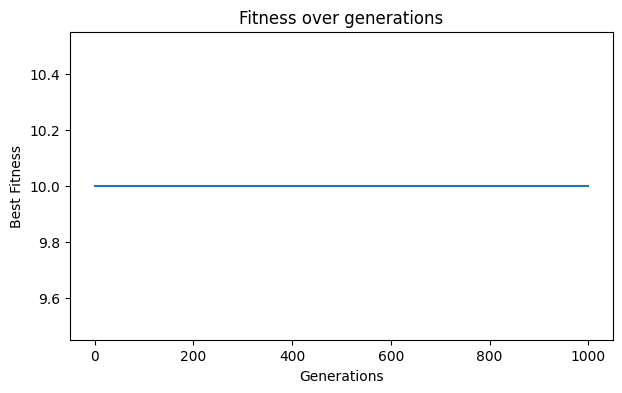

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(fitness_history)
plt.title('Fitness over generations')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()